# Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Basic Inspection - Head and Info

In [119]:
# first step of basic EDA
def print_head_info(df, df_name):
    print(f"Head of {df_name}:")
    print(df.head())
    print("\n")

    print(f"{df_name} Info:")
    df.info()
    print("-" * 55)


# check basic data input sanity
def check_missing_values(df, df_name):
    missing_count = df.isnull().sum()
    missing_count = missing_count[missing_count > 0]
    
    if missing_count.empty:
        print(f"No missing values found in any column in {df_name}.")
        print("-" * 55)
        return
    
    missing_percentage = (missing_count / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage.round(2).astype(str) + '%' 
    }).sort_values(by='Missing Count', ascending=False)
    
    print(missing_summary)
    print("-" * 55)
    

In [128]:
# Sample Solution
sample_df = pd.read_csv('learn-ai-bbc/BBC News Sample Solution.csv')

SAMPLE_NAME = 'Sample Solution'

print_head_info(sample_df, SAMPLE_NAME)
check_missing_values(sample_df, SAMPLE_NAME)


Head of Sample Solution:
   ArticleId       Category
0       1018          sport
1       1319           tech
2       1138       business
3        459  entertainment
4       1020       politics


Sample Solution Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
-------------------------------------------------------
No missing values found in any column in Sample Solution.
-------------------------------------------------------


In [129]:
# take a look at head and basic info
train_df = pd.read_csv('learn-ai-bbc/BBC News Train.csv')
test_df = pd.read_csv('learn-ai-bbc/BBC News Test.csv')

TRAIN_NAME = 'Train Data'
TEST_NAME = 'Test Data'

print_head_info(train_df, TRAIN_NAME)
print_head_info(test_df, TEST_NAME)

Head of Train Data:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
-------------------------------------------------------
Head of Test Data:
   ArticleId                                               Text
0       1018  qpr keeper d

## Check Missing Values

In [130]:
# check if all the values exist
check_missing_values(train_df, TRAIN_NAME)
check_missing_values(test_df, TEST_NAME)

No missing values found in any column in Train Data.
-------------------------------------------------------
No missing values found in any column in Test Data.
-------------------------------------------------------


## Compare Total Number of Articles

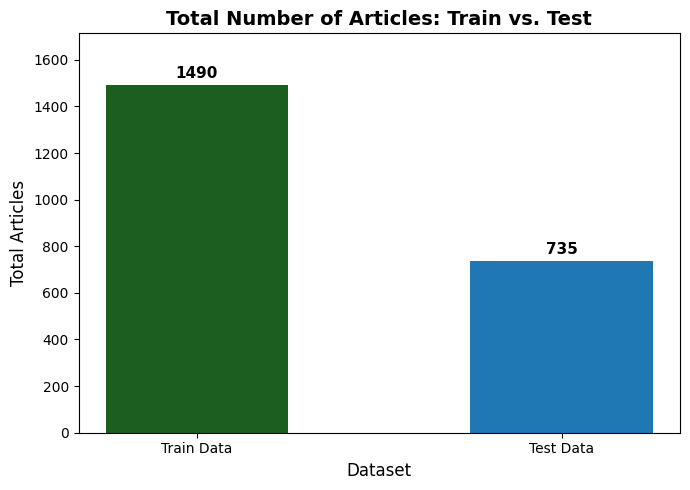

In [57]:
COLOR_TRAIN = '#1B5E20'  # dark green
COLOR_TEST = '#1f77b4'   # navy

BAR_WIDTH = 0.5 

data_sizes = {
    TRAIN_NAME: len(train_df),
    TEST_NAME: len(test_df)
}
dataset_names = list(data_sizes.keys())
article_counts = list(data_sizes.values())
bar_colors = [COLOR_TRAIN, COLOR_TEST]

# plot bar chart
plt.figure(figsize=(7, 5)) 
plt.style.use('default')
plt.bar(
    dataset_names, 
    article_counts, 
    color=bar_colors,
    width=BAR_WIDTH
)

plt.title('Total Number of Articles: Train vs. Test', fontsize=14, fontweight='bold')
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Total Articles', fontsize=12)
plt.ylim(0, max(article_counts) * 1.15) 

for i, count in enumerate(article_counts):
    plt.text(
        i, count + 30,
        str(count), 
        ha='center', 
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

## Category Distribution Analysis

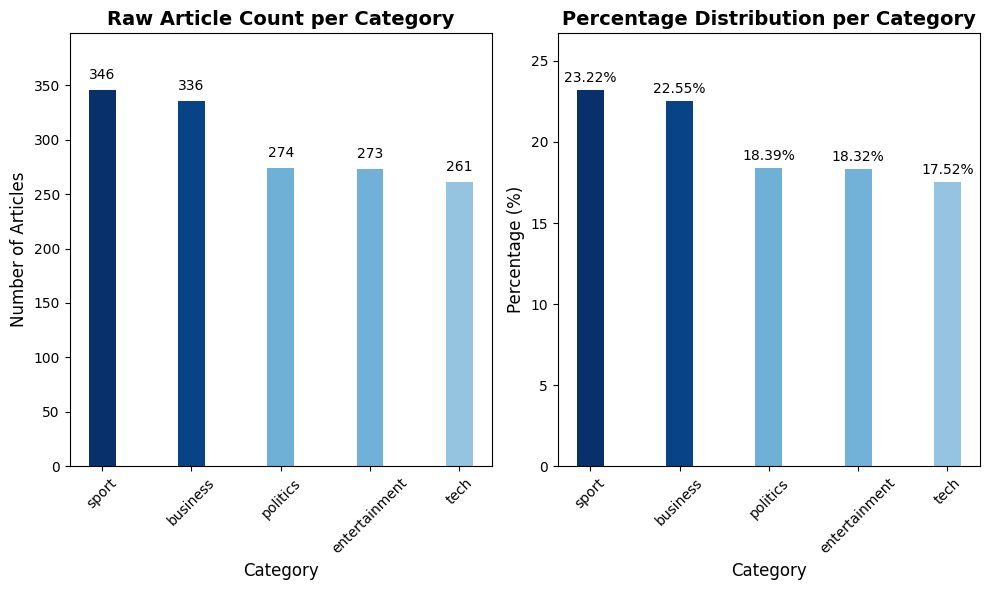

In [66]:
category_counts = train_df['Category'].value_counts()
category_percentages = (train_df['Category'].value_counts(normalize=True) * 100).round(2)
category_order = category_counts.index

cmap = plt.colormaps.get_cmap('Blues') 
CMAP_MIN_VALUE = 0.4

# color adjustment per bar length
def get_colors_adjusted(data_values, cmap, cmap_min):
    normalized = (data_values - data_values.min()) / (data_values.max() - data_values.min())
    scaled_normalized = normalized * (1.0 - cmap_min) + cmap_min
    return cmap(scaled_normalized)

colors_counts = get_colors_adjusted(category_counts.values, cmap, CMAP_MIN_VALUE)
colors_percentages = get_colors_adjusted(category_percentages.values, cmap, CMAP_MIN_VALUE)

# plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 6)) 
plt.style.use('default') 


# raw article count
axes[0].bar(
    category_order, 
    category_counts.values, 
    color=colors_counts, 
    width=BAR_WIDTH
)

axes[0].set_title('Raw Article Count per Category', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Articles', fontsize=12)
axes[0].set_xlabel('Category', fontsize=12)
axes[0].tick_params(axis='x', rotation=45) 
axes[0].set_ylim(0, category_counts.max() * 1.15) 

for i, count in enumerate(category_counts.values):
    axes[0].text(
        i, count + 10, 
        str(count), 
        ha='center', 
        fontsize=10
    )


# percentage per category
axes[1].bar(
    category_order, 
    category_percentages.values, 
    color=colors_percentages, 
    width=BAR_WIDTH
)

axes[1].set_title('Percentage Distribution per Category', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('Category', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, category_percentages.max() * 1.15) 

for i, percentage in enumerate(category_percentages.values):
    axes[1].text(
        i, percentage + 0.5, 
        f'{percentage}%', 
        ha='center', 
        fontsize=10
    )

plt.tight_layout()
plt.show()

## Word Count Analysis

In [72]:
# count number of words
train_df['word_count'] = train_df['Text'].apply(lambda x: len(str(x).split()))

word_stats = train_df['word_count'].describe().to_dict()

print("\nArticle Word Count Statistics:")
print("-" * 55)
print(f"Total Articles (count): {int(word_stats['count']):,}")
print(f"Mean (Average) Length:  {word_stats['mean']:.2f} words")
print(f"Median (50th Pctl):     {word_stats['50%']:.0f} words")
print(f"Standard Deviation:     {word_stats['std']:.2f}")
print(f"Minimum Length:         {word_stats['min']:.0f} words")
print(f"Maximum Length:         {word_stats['max']:.0f} words")
print("-" * 55)

display_df = train_df.head().copy()
display_df['Text_Snippet'] = display_df['Text'].apply(lambda x: str(x)[:80] + '...') # truncate the endless texts

print("\nTrain Data Head with Word Count:")
print(display_df[['ArticleId', 'Category', 'word_count', 'Text_Snippet']].to_markdown(index=False))


Article Word Count Statistics:
-------------------------------------------------------
Total Articles (count): 1,490
Mean (Average) Length:  385.01 words
Median (50th Pctl):     337 words
Standard Deviation:     210.90
Minimum Length:         90 words
Maximum Length:         3345 words
-------------------------------------------------------

Train Data Head with Word Count:
|   ArticleId | Category   |   word_count | Text_Snippet                                                                        |
|------------:|:-----------|-------------:|:------------------------------------------------------------------------------------|
|        1833 | business   |          301 | worldcom ex-boss launches defence lawyers defending former worldcom chief bernie... |
|         154 | business   |          325 | german business confidence slides german business confidence fell in february kn... |
|        1101 | business   |          514 | bbc poll indicates economic gloom citizens in a majority o

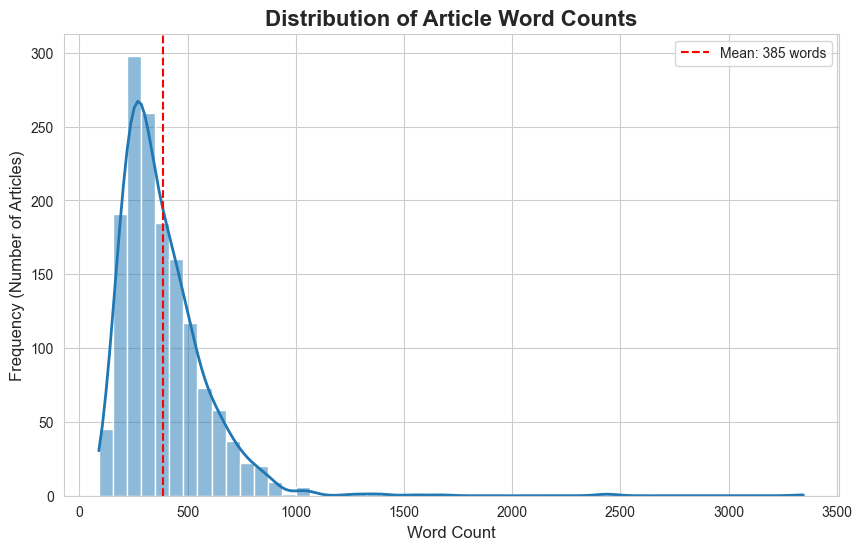

In [84]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# plot 
sns.histplot(
    data=train_df, 
    x='word_count', 
    bins=50,
    kde=True,
    color='#1f77b4',
    line_kws={'linewidth': 2, 'color': '#ff7f0e'}
)

plt.title('Distribution of Article Word Counts', fontsize=16, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency (Number of Articles)', fontsize=12)
mean_count = train_df['word_count'].mean()
plt.axvline(mean_count, color='r', linestyle='--', linewidth=1.5, label=f'Mean: {mean_count:.0f} words')
plt.legend()

plt.show()

## TF-IDF Vectorization

In [100]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

N_COMPONENTS = 2
RANDOM_STATE = 42
N_SAMPLES = 800
MAX_FEATURES = 10000

# TF-IDF vectorization with bigrams
vectorizer = TfidfVectorizer(
    stop_words='english',      
    max_features=MAX_FEATURES,
    ngram_range=(1, 2)
)

corpus = train_df['Text'].tolist()
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = np.array(vectorizer.get_feature_names_out())

print(f"Matrix Shape: {tfidf_matrix.shape}")

Matrix Shape: (1490, 10000)


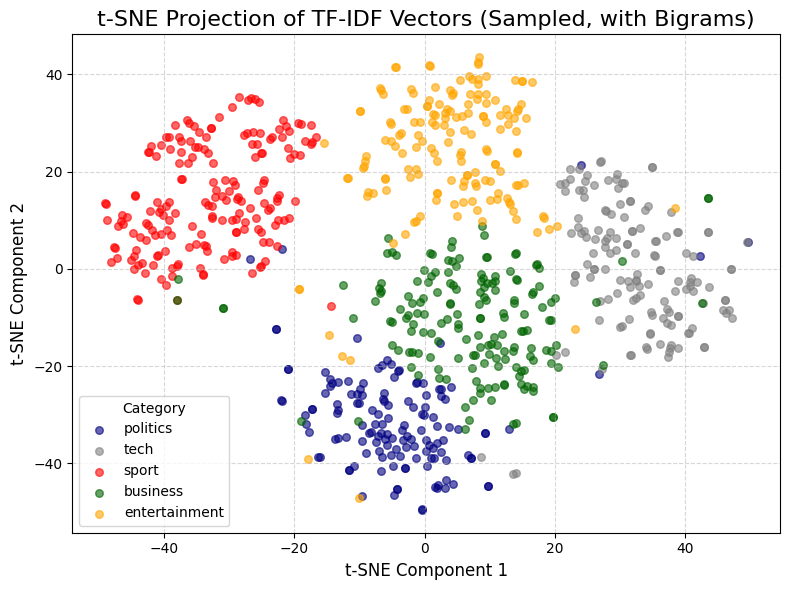

In [101]:
# sample to avoid disaster
sample_indices = np.random.choice(tfidf_matrix.shape[0], N_SAMPLES, replace=False)

tfidf_sample = tfidf_matrix[sample_indices, :]
category_sample = train_df['Category'].iloc[sample_indices]

# apply t-SNE
tsne = TSNE(
    n_components=N_COMPONENTS, 
    init='pca',
    random_state=RANDOM_STATE,
    learning_rate='auto'
)

tsne_results = tsne.fit_transform(tfidf_sample.toarray())

# plot
plt.figure(figsize=(8, 6))

color_map = {
    'business': 'darkgreen',
    'entertainment': 'orange',
    'politics': 'navy',
    'sport': 'red',
    'tech': 'grey'
}
category_labels = category_sample.to_numpy()

for category in category_sample.unique():
    mask = (category_labels == category)
    
    plt.scatter(
        tsne_results[mask, 0],
        tsne_results[mask, 1],
        label=category,
        color=color_map.get(category),
        alpha=0.6,
        s=30
    )

plt.title('t-SNE Projection of TF-IDF Vectors (Sampled, with Bigrams)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Comparative Feature Analysis

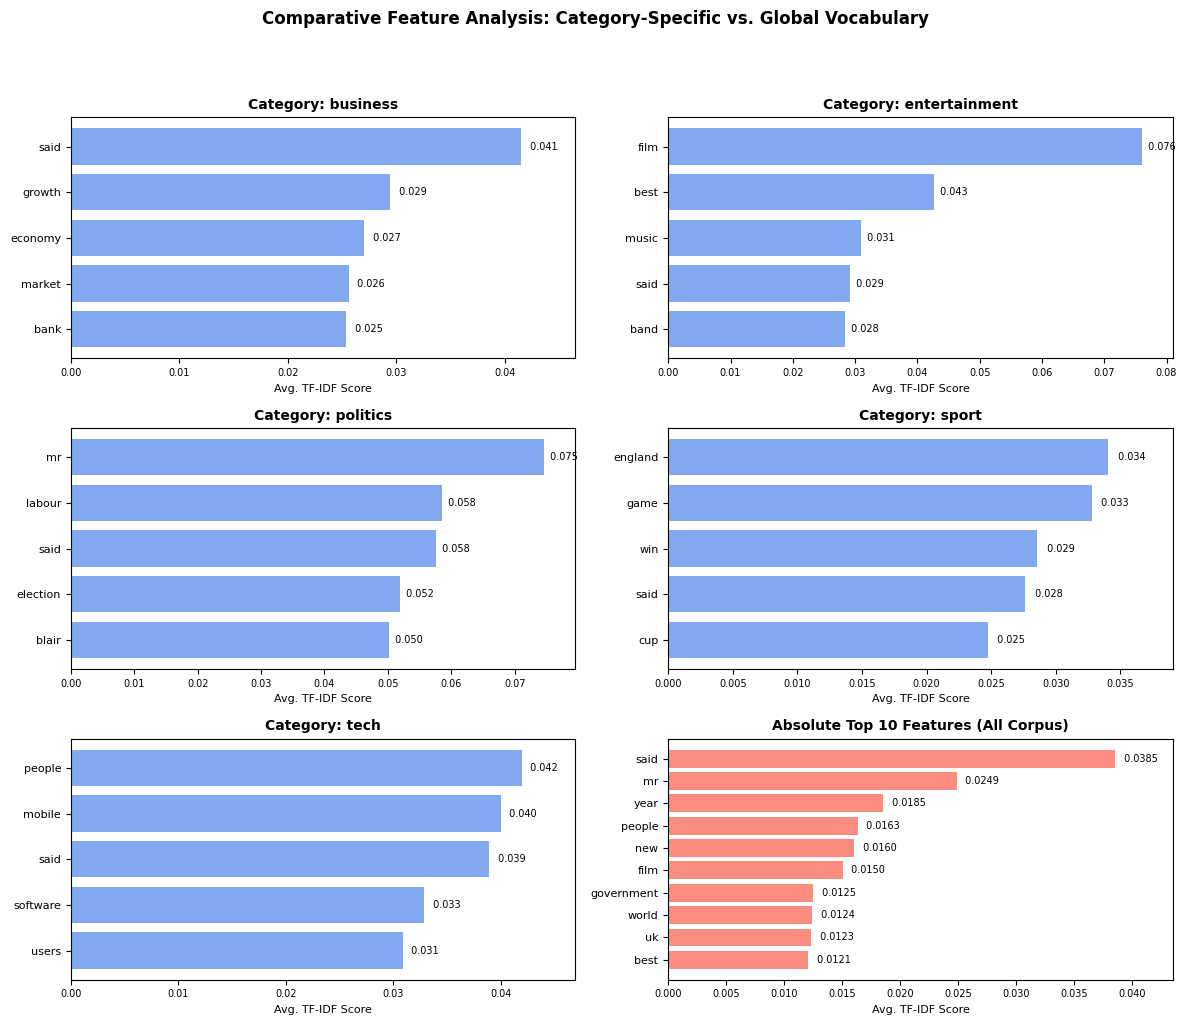

In [118]:
N_TOP_FEATURES_VISUAL = 5
N_TOP_ABSOLUTE_FEATURES = 10
LIGHT_BLUE = '#6495ED'      
LIGHT_RED = '#FA8072'       
OPACITY = 0.8               
N_COLS = 2                  
N_ROWS = 3                  
X_AXIS_PADDING = 0.005
PLOT_COLOR_CAT = LIGHT_BLUE
PLOT_COLOR_SUMMARY = LIGHT_RED

# calculate top features based on average tf-idf score
def calculate_top_features(category, df, matrix, names, n_features, is_summary=False):
    if is_summary:
        avg_scores = matrix.mean(axis=0).A1
    else:
        category_indices = df[df['Category'] == category].index
        category_vectors = matrix[category_indices.values, :]
        avg_scores = category_vectors.mean(axis=0).A1
    
    top_indices = avg_scores.argsort()[-n_features:]    
    top_scores = avg_scores[top_indices][::-1]
    top_features = names[top_indices][::-1]
    
    return top_features, top_scores


# plot bar chart
def plot_bar_chart(ax, features, scores, title, color, alpha, is_summary=False):
    scores_plot = np.array(scores)
    features_plot = features
    
    features_plot = features_plot[::-1]
    scores_plot = scores_plot[::-1]
    
    ax.barh(features_plot, scores_plot, color=color, alpha=alpha)    
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.set_xlabel('Avg. TF-IDF Score', fontsize=8)
    
    max_score = max(scores_plot) if scores_plot.size > 0 else 0
    ax.set_xlim(right=max_score + X_AXIS_PADDING)
    
    text_format_template = " {:.4f}" if is_summary else " {:.3f}"    
    for index, value in enumerate(scores_plot):
        
        # Cast value to standard float and use the format template
        formatted_label = text_format_template.format(float(value))

        ax.text(
            float(value) + 0.0005, 
            index, 
            formatted_label, 
            va='center', 
            fontsize=7
        )
    
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=7)



# set up plot grid
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(12, 10)) 
plt.style.use('default')
axes = axes.flatten()
all_categories = sorted(train_df['Category'].unique())

# plot 5 categories
for i, category in enumerate(all_categories):
    top_features, top_scores = calculate_top_features(
        category, train_df, tfidf_matrix, feature_names, N_TOP_FEATURES_VISUAL, is_summary=False
    )
    
    plot_bar_chart(
        axes[i], top_features, top_scores,
        f'Category: {category}', PLOT_COLOR_CAT, OPACITY
    )


# plot absolute top features
top_abs_features, top_abs_scores = calculate_top_features(
    None, train_df, tfidf_matrix, feature_names, N_TOP_ABSOLUTE_FEATURES, is_summary=True
)

plot_bar_chart(
    axes[5], top_abs_features, top_abs_scores,
    f'Absolute Top {N_TOP_ABSOLUTE_FEATURES} Features (All Corpus)', PLOT_COLOR_SUMMARY, 0.9, is_summary=True
)


fig.suptitle('Comparative Feature Analysis: Category-Specific vs. Global Vocabulary', fontsize=12, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()